# Machine Learning
# Assignment 4: Decision Trees

Please write your full name here
- **Name** : "Somaia Ahmed Abdelrahman"

## Instructions
- Please place your code where you're asked to. Do not change any other code.
- Submit the notebook with your solutions and keep the cell outputs.
- Please name your notebook in the following format "assignment4_FirstnameLastname.ipynb"
- Late submissions will be penalized.

In [ ]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Part 1 Decision Tree


In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

## Q1 Plot decision tree using export_graphviz

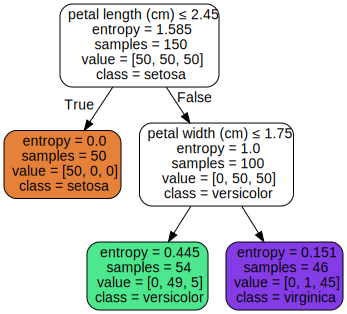

In [ ]:
# Answer:

from graphviz import Source
from sklearn.tree import export_graphviz
import graphviz

dot_data = export_graphviz(
    tree_clf,
    out_file = None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled = True,
    rounded = True,
    special_characters=True
)

graph = graphviz.Source(dot_data)
graph.render("iris_tree", format="png", cleanup=False)
graph


## Q2 Plotting decision boundaries

Use the following function to plot the decision boundaries of DT from Q1

In [ ]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

Plotting for max_depth = 2

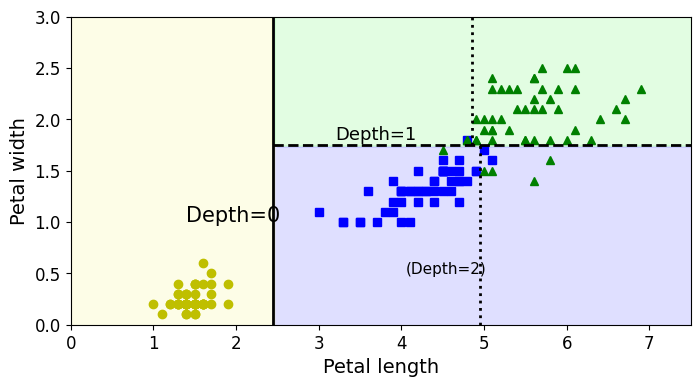

In [ ]:
plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_clf, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

### Q2.1
- Train the decision tree using a maximum depth of 1.
- Plot the decision tree using graphviz
- Use the above function to plot the decision boundaries

**Question**
1. After plotting the resulting tree.
    - What's the output entropy in each block?
    - Comment on the entropy values in each block.
2. What's the difference in decision trees between using max_depth = 1, max_depth = 2, max_depth = 10? *Hint: Plot the tree in each case*

**Answer**

1. * Root Node : entropy = 1.585 "the worest case for 3 class c;lassification problem log2(3)
   * Left child : entropy = 0 "Pure node "setosa" no uncertinity"

   * Right child : entropy = 1 "The node contains equal number of versicolor and virginica samples ([0, 50, 50]), so it's not pure

2.  * Accuracy (max_depth = 1): 0.67 underfitting
    * Accuracy (max_depth = 2): 0.96 good
    * Accuracy (max_depth = 10): 0.99 overfitting

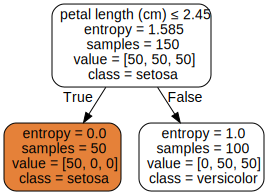

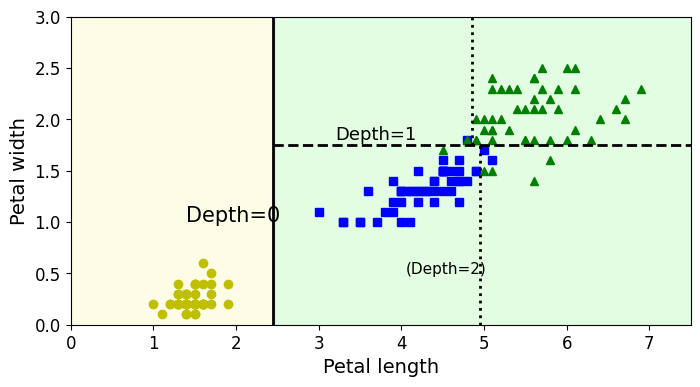

In [ ]:
####### YOUR CODE HERE
tree_d1 = DecisionTreeClassifier(max_depth=1, random_state=42, criterion='entropy')
tree_d1.fit(X, y)


dot_data_d1 = export_graphviz(
    tree_d1,
    out_file = None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled = True,
    rounded = True,
    special_characters=True
)

graph = graphviz.Source(dot_data_d1)
graph.render("iris_tree", format="png", cleanup=False)
display(graph)

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_d1, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()


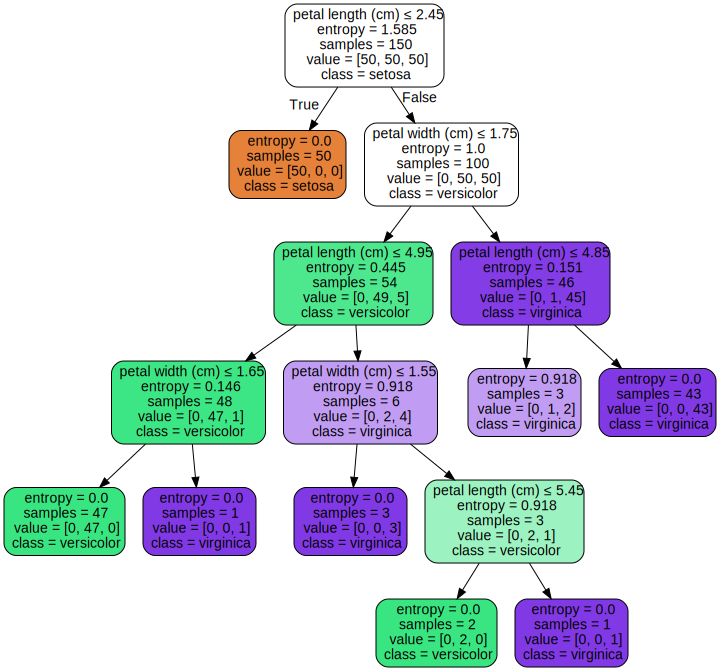

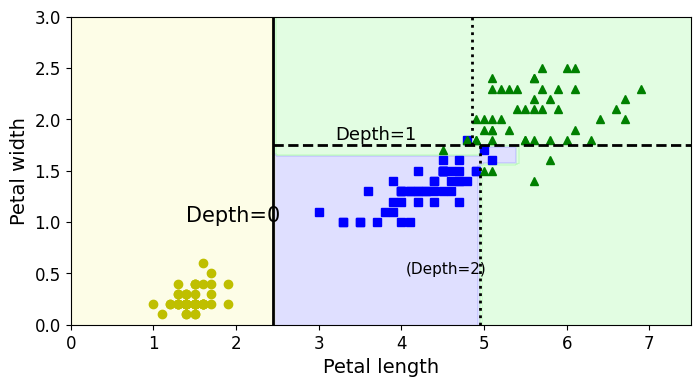

In [ ]:
####### YOUR CODE HERE
tree_d10 = DecisionTreeClassifier(max_depth=10, random_state=42, criterion='entropy')
tree_d10.fit(X, y)


dot_data_d10 = export_graphviz(
    tree_d10,
    out_file = None,
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    filled = True,
    rounded = True,
    special_characters=True
)

graph = graphviz.Source(dot_data_d10)
graph.render("iris_tree", format="png", cleanup=False)
display(graph)

plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_d10, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y, tree_d1.predict(X))
print(f" Accuracy (max_depth = {1}): {acc:.2f}")

acc = accuracy_score(y, tree_clf.predict(X))
print(f" Accuracy (max_depth = {2}): {acc:.2f}")

acc = accuracy_score(y, tree_d10.predict(X))
print(f" Accuracy (max_depth = {10}): {acc:.2f}")

 Accuracy (max_depth = 1): 0.67
 Accuracy (max_depth = 2): 0.96
 Accuracy (max_depth = 10): 0.99


### Q2.2

**Question**
1. Calculate probabilities of all classes on this data point X = [[5, 1.5]] using decision tree with max_depth = 2
2. Compare your result with "predict_proba" function.

**Answer**
1.

* Root Node

Rule: petal length (X[:, 0]) ≤ 2.45
Value: 5 > 2.45 →  False → go to the right child

* Second Level Node (Right Child of Root)

Rule: petal width (X[:, 1]) ≤ 1.75
Value: 1.5 ≤ 1.75 →  True → go to the left child

Predection: **versicolor**

In [ ]:
######### Your code for (2)
X_new =np.array([[5, 1.5]])

propa = tree_clf.predict_proba(X_new)
print("Predict_Propa result: ", propa)

predection = tree_clf.predict(X_new)
print("Predicted class: ", iris.target_names[predection[0]])

Predict_Propa result:  [[0.         0.90740741 0.09259259]]
Predicted class:  versicolor


## Question 3 Sensitivity to data

### Q3.1 Decision Tree
**Question**
1. Fit a decision tree classifier max_depth = 2, to the data
2. Plot the resulting decision boundaries
3. Print the classifier score on training data

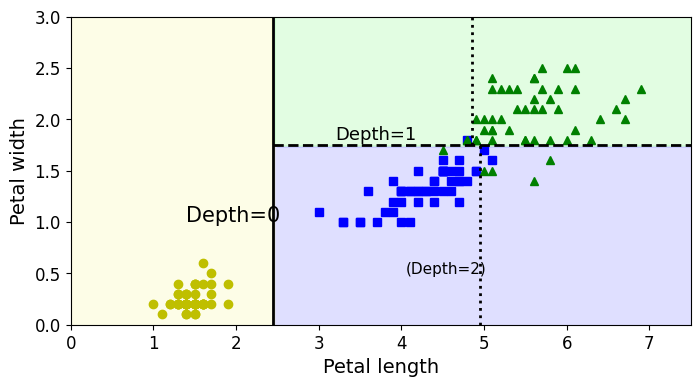

Accuracy of Decision Tree model: 0.96


In [ ]:
##### YOUR CODE HERE
####### YOUR CODE HERE
tree_q3 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_q3.fit(X, y)


plt.figure(figsize=(8, 4))

plot_decision_boundary(tree_q3, X, y)

plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)
plt.show()

acc = accuracy_score(y, tree_q3.predict(X))
print(f"Accuracy of Decision Tree model: {acc:.2f}")


The following cell rotates the data by angle **30**

In [ ]:
angle = np.pi / 180 * 30
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

**Question**
1. Fit another decision tree classifier max_depth = 2, to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

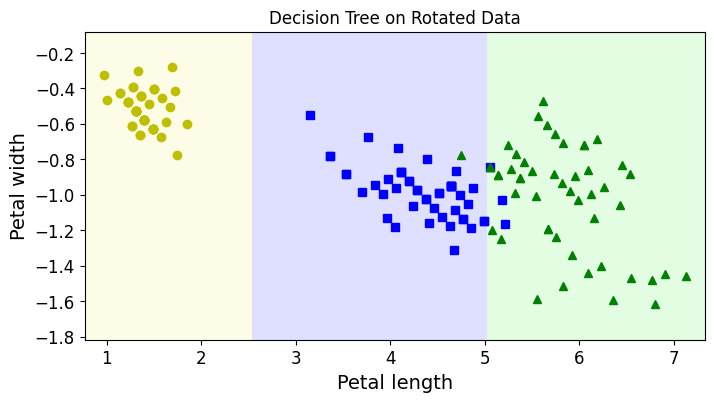

 Accuracy of Decision Tree on Rotated Data: 0.97


In [ ]:
##### YOUR CODE HERE
tree_q31 = DecisionTreeClassifier(max_depth=2, random_state=42, criterion='entropy')
tree_q31.fit(Xr, y)

# Plot decision boundary
plt.figure(figsize=(8, 4))

x1_min, x1_max = Xr[:, 0].min() - 0.2, Xr[:, 0].max() + 0.2
x2_min, x2_max = Xr[:, 1].min() - 0.2, Xr[:, 1].max() + 0.2

plot_decision_boundary(tree_q31, Xr, y, axes=[x1_min, x1_max, x2_min, x2_max])
plt.title("Decision Tree on Rotated Data")

plt.show()

# Accuracy score
acc = accuracy_score(y, tree_q31.predict(Xr))
print(f" Accuracy of Decision Tree on Rotated Data: {acc:.2f}")

### Q3.2 Logistic Regression
The following function plots the decision boundaries for a logistic regression classifier

In [ ]:
import numpy as np
def plot_logistic_regression(clf, X, y, axes, iris=True):

  x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
  y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
  h = 0.02  # step size in the mesh
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

  plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
  plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
  plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris virginica")

  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
  else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  plt.legend(loc="lower right", fontsize=14)
  plt.show()

**Question**

1. Fit a logistic regression classifier to the original data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

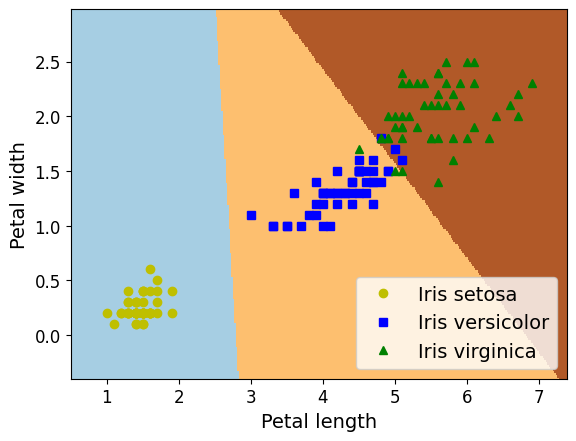

Accuracy of Logistic Regression model= 0.9666666666666667


In [ ]:
##### YOUR CODE HERE
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X, y)

axes = [X[:, 0].min() - 0.5, X[:, 0].max() + 0.5,
        X[:, 1].min() - 0.5, X[:, 1].max() + 0.5]

plot_logistic_regression(log_reg, X, y, [0, 7.5, 0, 3])

acc = accuracy_score(y, log_reg.predict(X))

print(f"Accuracy of Logistic Regression model= {acc}")


**Question**
1. Fit another logistic regression classifier to the rotated data
2. Plot the resulting decision boundaries
3. Print the clasifier score on training data

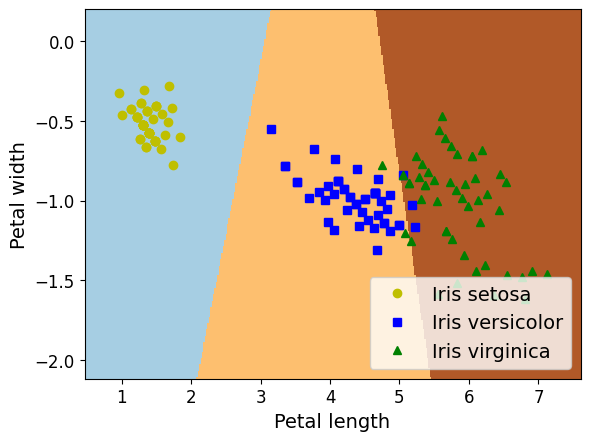

Accuracy of Logistic Regression model on rotated data = 0.9666666666666667


In [ ]:
###### YOUR CODE HERE
log_reg_rot = LogisticRegression(random_state=42)
log_reg_rot.fit(Xr, y)

axes = [Xr[:, 0].min() - 0.5, Xr[:, 0].max() + 0.5,
        Xr[:, 1].min() - 0.5, Xr[:, 1].max() + 0.5]

plot_logistic_regression(log_reg_rot, Xr, y, axes)

acc_rot = accuracy_score(y, log_reg_rot.predict(Xr))

print(f"Accuracy of Logistic Regression model on rotated data = {acc_rot}")


### Q3.3
1. Comment on the differences between the logistic regression and decision trees classifiers scores to the original and rotated data
2. Explain why that happened?

**Answer**

1. * Logistic Regression:
No change in accuracy before and after rotation.
   * Decision Trees:
Accuracy slightly improved from 0.96 to 0.97 after rotation.

2. *  Logistic regression is a linear model that uses dot products of features. These dot products are invariant to rotations (when applied to both data and weights).
   * Decision trees split only along feature axes (horizontal or vertical). When rotating the data, it changes the shape and alignment of the clusters w.r.t the new axes.

## Question 4 GridSearch

1. Generate a moons dataset using `make_moons(n_samples=10000, noise=0.35)`.

In [ ]:
from sklearn.datasets import make_moons

X_moons, y_moons = make_moons(n_samples = 10000, noise = 0.35, random_state=42)

2. Split it into a training set and a test set using train_test_split().

In [ ]:
from sklearn.model_selection import train_test_split

X_train_moon, X_test_moon, y_train_moon, y_test_moon = train_test_split(
    X_moons, y_moons, test_size = 0.2, random_state=42)

3. Use grid search with cross-validation (with the help of the GridSearchCV class) to find best hyperparameter (max_depth, max_leaf_nodes, min_samples_split) values for a DecisionTreeClassifier.
    - Choose reasonable values for each hyperparameter.
    - Use the training data portion.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

moon_tree = DecisionTreeClassifier(random_state = 42)

param_grid = {
    'max_depth': [3, 5, 7,10, 20, None],
    'max_leaf_nodes': [2, 10, 20, 50, None],
    'min_samples_split': [2, 5, 7, 10]
}

grid_search = GridSearchCV(moon_tree, param_grid, cv = 5, scoring = 'accuracy', return_train_score=True)

grid_search.fit(X_train_moon, y_train_moon)

print("Best Hyperparameters found: ", grid_search.best_params_)

print("Best cross_Validation score : {:.2f}".format(grid_search.best_score_))

# test_score = grid_search.score(X_test_moon, y_test_moon)
# print(f"Test set score with best model: {test_score:.2f}")

Best Hyperparameters found:  {'max_depth': 7, 'max_leaf_nodes': 20, 'min_samples_split': 2}
Best cross_Validation score : 0.88


4. Train it on the full training set using the best hyperparameters, and measure your model's performance on the test set.

In [ ]:
best_param = grid_search.best_params_
best_moon_model = DecisionTreeClassifier(**best_param, random_state = 42)

best_moon_model.fit(X_train_moon, y_train_moon)

test_acc = best_moon_model.score(X_test_moon, y_test_moon)
print(f"Test set score with best model: {test_acc:.2f}")

Test set score with best model: 0.90


## Question 5 Regression Tree

### Question
For the following plot of the two decision tree regressors:
1. Comment on the results
2. Which model has a higher variance error? why?
3. Which model has a higher bias error? why?

**Answer**

1. * max_depth = 2 => underfitting model is simpler
   * max_depth = 5 => overfitting model is more complex
2. higher variance error : the max_depth = 5 model, because a deeper tree is more sensitive to small fluctuations in the training data leading to overfitting.

3. higher bias error: the max_depth = 2 model, because shallower tree is too simple and can not capture the underlying trends in the data leading to underfitting.

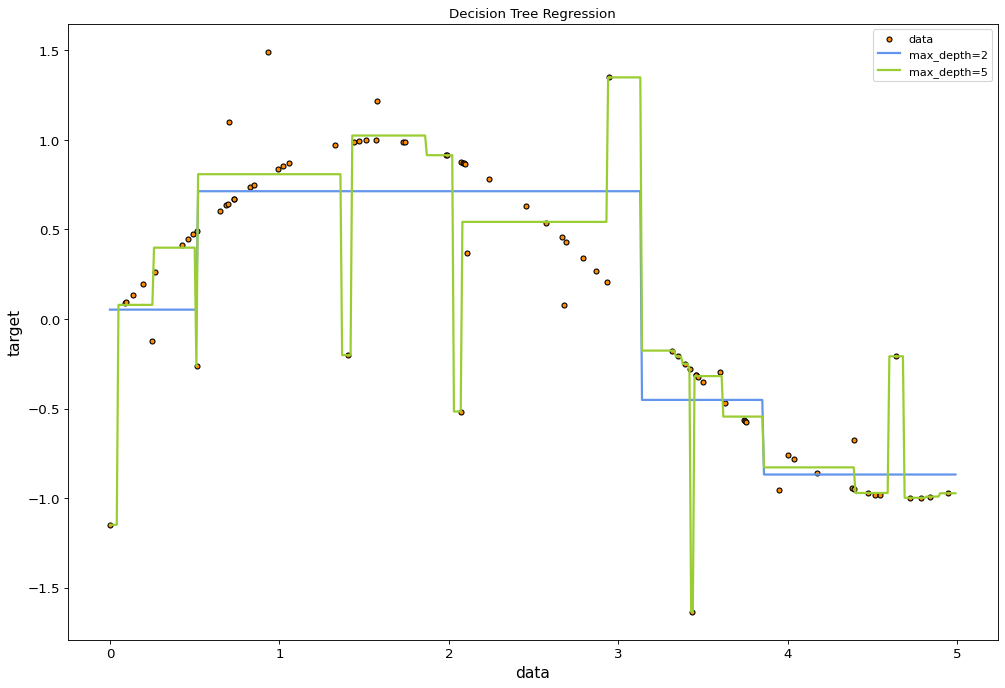

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(15,10),dpi=80)
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()